In [2]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
plt.rcParams["font.size"]=10
plt.rcParams["figure.figsize"]=(10,6)
plt.rcParams["font.family"]='BM YEONSUNG'
plt.rcParams["axes.unicode_minus"]=False

In [4]:
D = pd.read_excel("https://data.hossam.kr/E03/mtcars.xlsx", index_col='name')
D.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
data=D.filter(['mpg', 'vs', 'am', 'gear', 'carb'])

<Figure size 1000x600 with 0 Axes>

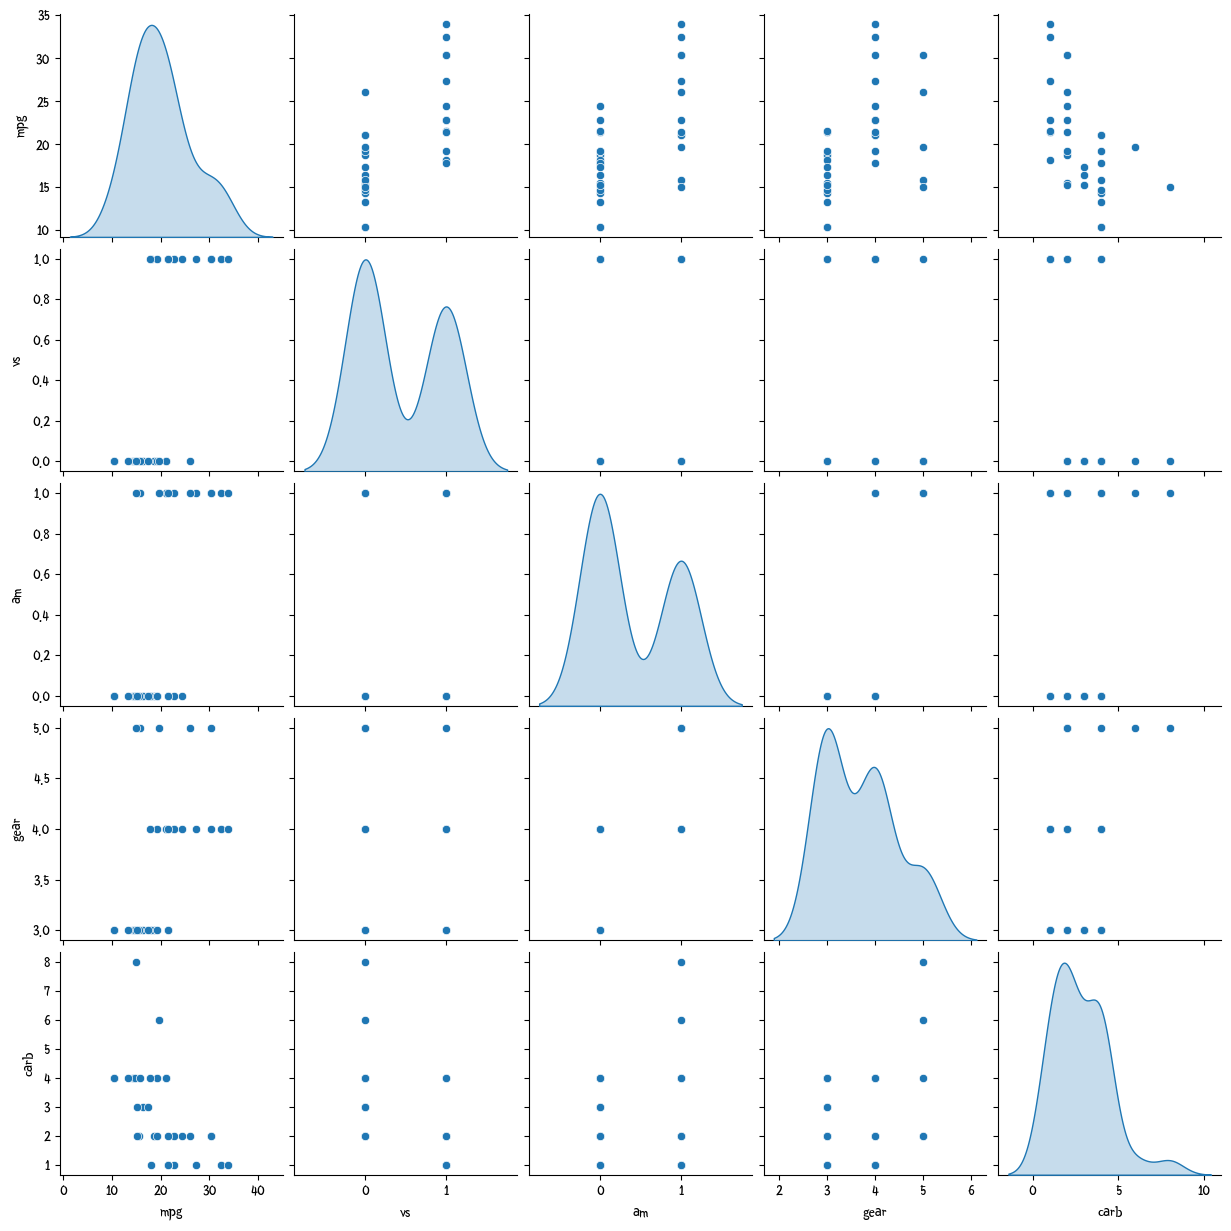

In [11]:
plt.figure()
sb.pairplot(data=data,
            diag_kind="kde",
            )
plt.show()
plt.close()

### 범주형 데이터는 산점도 행렬로 분석하기 어렵다

<Axes: >

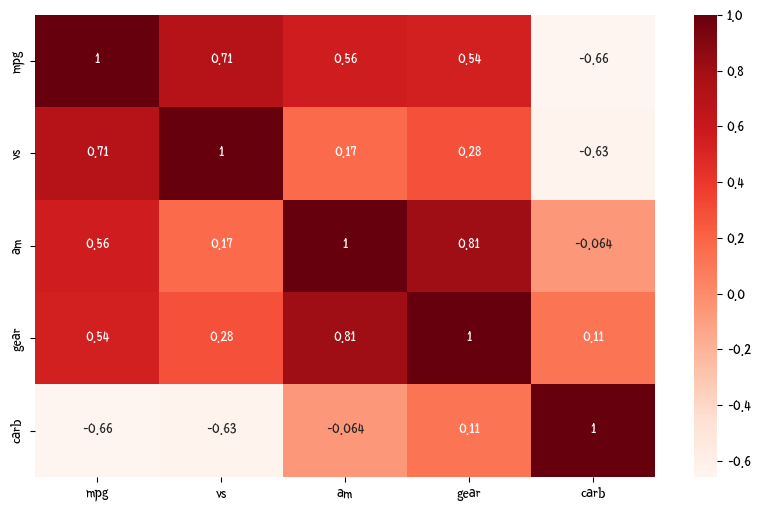

In [16]:
plt.figure()
sb.heatmap(data.corr(method="spearman"),annot=True,cmap="Reds")

### 검정

In [18]:
cols=[]
for i in range(len(data.columns)-1):
    for j in range(i+1,len(data.columns)):
        cols.append((data.columns[i],data.columns[j]))

In [19]:
result={}
for col in cols:
    t=sc.stats.spearmanr(data[col[0]],data[col[1]])
    result[f'{col[0]} & {col[1]}']={"statistic":t[0],"p-value":t[1]}

In [20]:
final=pd.DataFrame(result).T
final["result"]=final["p-value"]<0.05
final["정도"]=abs(final["statistic"])>0.6

In [21]:
final

,statistic,p-value,result,정도
mpg & vs,0.706597,6.191450e-06,True,True
mpg & am,0.562006,8.156989e-04,True,False
mpg & gear,0.542782,1.328681e-03,True,False
mpg & carb,-0.657498,4.337570e-05,True,True
vs & am,0.168345,3.570439e-01,False,False
vs & gear,0.282662,1.169934e-01,False,False
vs & carb,-0.633695,9.878823e-05,True,True
am & gear,0.807688,2.304063e-08,True,True
am & carb,-0.064365,7.263524e-01,False,False
gear & carb,0.114887,5.312358e-01,False,False
